# Comparison between the genders (after controlling for type and age)

Questions

- What are the differences between the genders?

Gender effect - General Questions

- What are the differences between the 2 genders?
- Are they different for the 3 ages?
- Are they different for the two types?

# Loads

## Libraries and functions

In [1]:
source("install_libraries.R")

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help


In [1]:
source("load_libraries.R")

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.


preparing gene to GO mapping data...
preparing IC data...
preparing gene to GO mapping data...
preparing IC data...
preparing gene to GO mapping data...
preparing IC data...


In [28]:
source("functions.R")

## Data

In [3]:
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [4]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [5]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [6]:
# Comparison between the ages (after controlling for type and gender)
M_F = results(dge,contrast= c(0,1,0,0,0,1/3,1/3,1/2,0,0), alpha=0.05, test="Wald")

In [7]:
samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2',
    'GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2',
    'SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2',
    'GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("gender", "type", "age")])
to_comp = c("M VS F")

# Stats

In [8]:
gender_global_stats = matrix(0, nrow=1, ncol=3)
rownames(gender_global_stats) = to_comp
colnames(gender_global_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
gender_global_stats[1,] = get_stats_padj(M_F)
gender_global_stats

,Wald padj < 0.05,LFC > 0 (Wald padj < 0.05),LFC < 0 (Wald padj < 0.05)
M VS F,4242,2193,2049


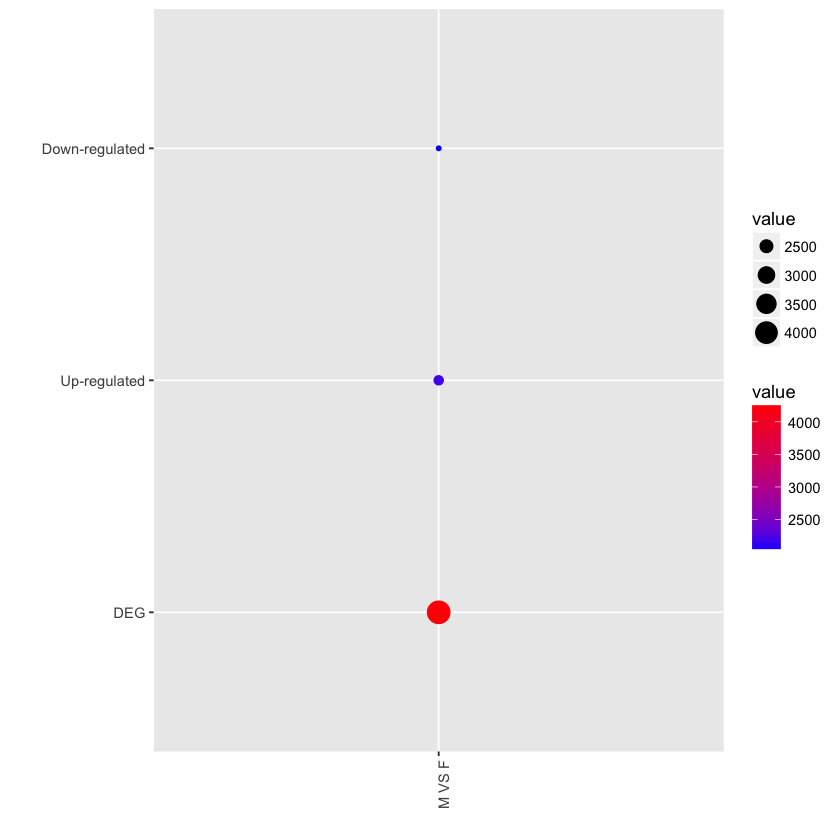

In [9]:
plot_stat_mat(gender_global_stats)

# Differentially expressed genes

In [10]:
gender_data = list(M_F)
names(gender_data) = to_comp
gender_deg = extract_diff_expr_genes(gender_data, "gender-effect/gender/")

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

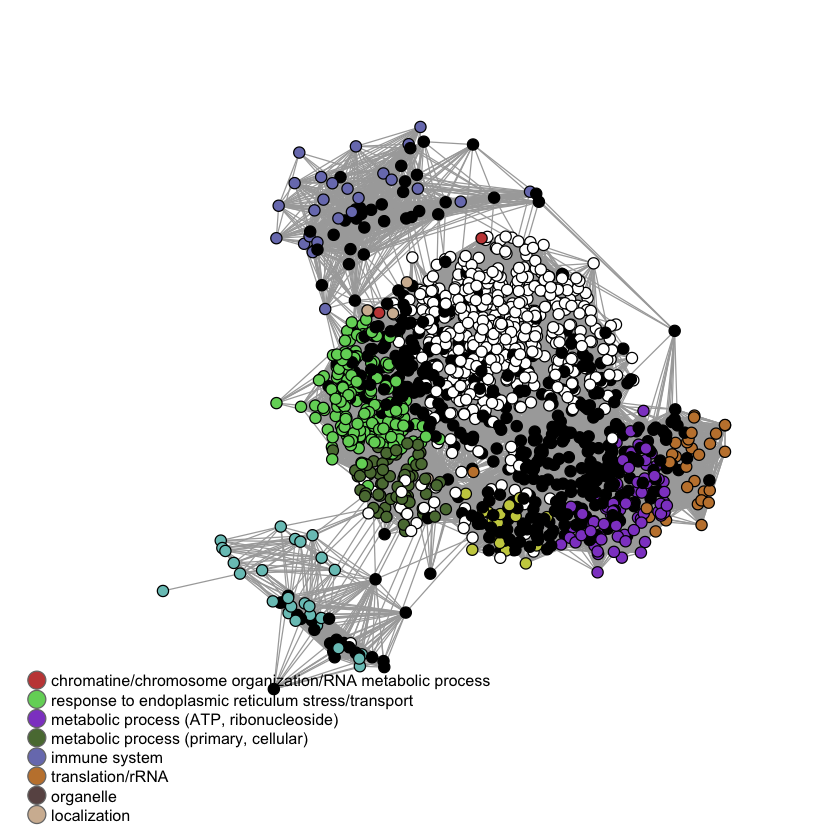

In [11]:
col_GF_vs_SPF = get_deg_colors(gender_deg, to_comp[1], connected_gene_colors, module_nb) 
plot_net_with_layout(net, col_GF_vs_SPF, pal2, layout)

# GO analysis

In [12]:
full_go_desc = gender_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = gender_deg$GO_wall[[1]][,"category"]

## Biological process

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

Warning message:
“Removed 1 rows containing missing values (geom_point).”

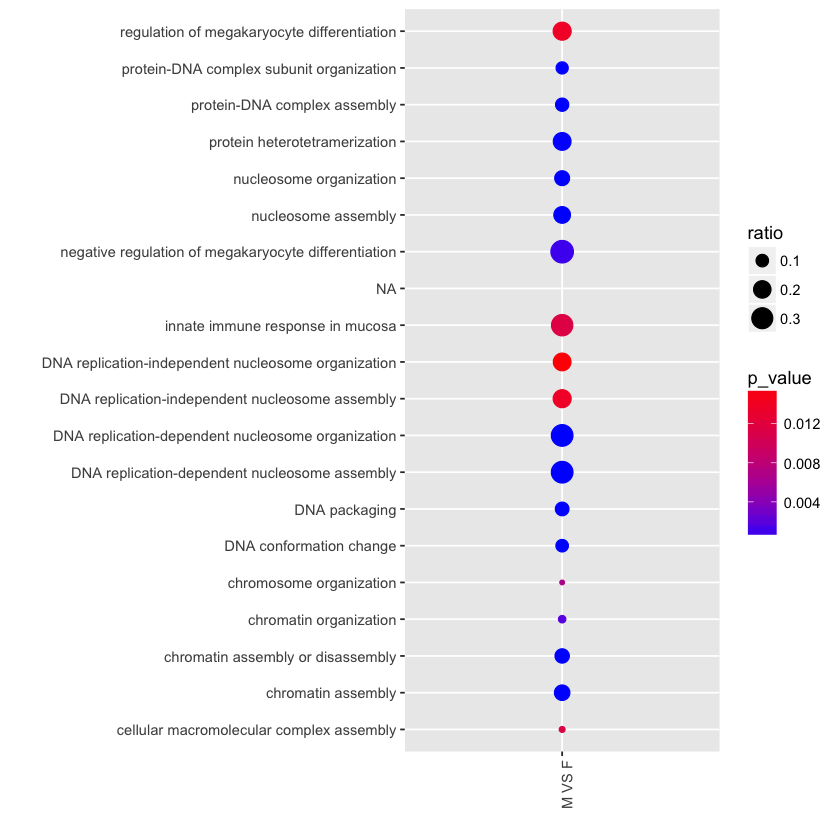

In [13]:
plot_top_go(gender_deg$over_represented_GO,
            gender_deg$GO_wall,
            "BP",
            to_comp,
            20)

In [27]:
get_ont_GO = function(go, ont){
    col_nb = dim(go)[2]
    val = which(go$ontology == ont)
    ont_go = go[val, 4:col_nb]
    if(!is.matrix(ont_go)){
        ont_go = matrix(ont_go, ncol = 1)
        colnames(ont_go) = colnames(go)[4:col_nb]
    }
    rownames(ont_go) = go[val, 1]
    return(ont_go)
}
head(get_ont_GO(go, ont))

,M VS F
GO:0006334,3.105681e-09
GO:0031497,1.839373e-08
GO:0034728,5.207321e-08
GO:0006333,1.667180e-07
GO:0006323,2.543001e-07
GO:0006335,5.356280e-07


In [29]:
BP_network = create_GO_network(gender_deg, "BP", BP_GO)
plot_GO_networks(BP_network, to_comp[1], full_go_desc, plot_non_interactive = FALSE)

HTML widgets cannot be represented in plain text (need html)

## Cellular components

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

Warning message:
“Removed 1 rows containing missing values (geom_point).”

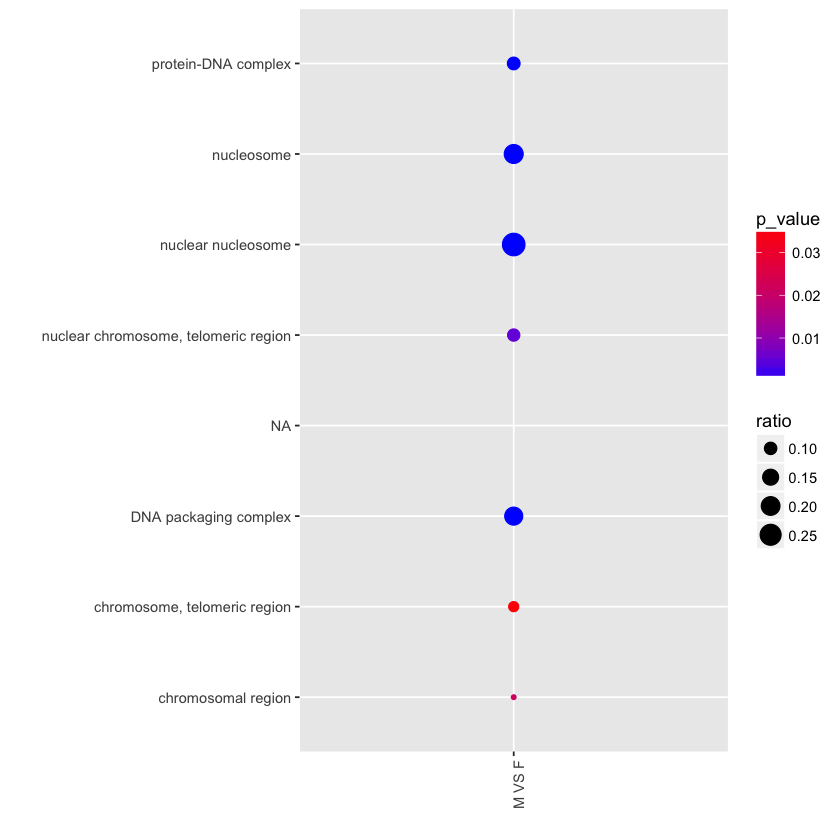

In [15]:
plot_top_go(gender_deg$over_represented_GO,
            gender_deg$GO_wall,
            "CC",
            to_comp,
            20)

## Molecular functions

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

In [30]:
plot_top_go(gender_deg$over_represented_GO,
            gender_deg$GO_wall,
            "MF",
            to_comp,
            20)

ERROR: Error in ratios[, i]: incorrect number of dimensions


# KEGG pathways

In [17]:
plot_kegg_pathways(gender_deg$over_represented_KEGG[,"category"],
                   gender_deg$fc_deg,
                   "../results/dge/gender-effect/gender/over_repr_kegg/")

[1] "Note: 13 of 4242 unique input IDs unmapped."


Pathway graphs available at [../results/dge/age-effect/age/over_repr_kegg/](../results/dge/age-effect/age/over_repr_kegg/)

In [18]:
plot_kegg_pathways(gender_deg$under_represented_KEGG[,"category"],
                   gender_deg$fc_deg,
                   "../results/dge/gender-effect/gender/under_repr_kegg/")

[1] "Note: 13 of 4242 unique input IDs unmapped."


Pathway graphs available at [../results/dge/age-effect/age/under_repr_kegg/](../results/dge/age-effect/age/under_repr_kegg/)